### Data Summary:

The data was taken from "Multimodal Joint Emotion and Game Context
Recognition in League of Legends Livestreams" by Charles Ringer, James Alfred Walker and Mihalis A. Nicolaou. More here: https://github.com/charlieringer/LoLEmoGameRecognition.

Input data consists of 20 frames from a game the entertainer (streamer) is playing and 20 frames from the webcam the entertainer is recording himself with. The video game frames are 128x128 pixels and the webcam is 64x64 pixels.  
All the preprocessing has already been done and the data seems to be normalized already. For some reason, I had problems processing all the video data and the final data set has been reduced by around 50% to about 5000 videos. All frames are in the "processed" folder as npy files. I wrote a script to save multiple frames per video in a single npz file. I ran this script once for 5 frames per video for the webcam data (data.npz) and once for 4 frames per video for the game data (data_game.npz). This took a pretty long time on my computer but loading the data from those npz files and transforming them into tensors made the data loading much faster.  

#### Labels
All the labels are in train_augmented.csv and test.csv with the corresponding video path. I transformed this csv into a cleaned-up version, since some videos were missing for some reason.

Labels correspond to the streamer data or the game data. 
For the webcam, there are labels for positive, neutral or negative feelings (valence) and whether the entertainer (streamer) is showing a lot of emotions or not (arousal). For the game itself, there are labels for what the streamer is currently doing inside the game. The game lets you play one character out of ~150 in total. You get matched with 9 other players, 4 of whom are in your own team. The objective is to destroy the opponent's base by numerous different means. One important aspect of the game is that you can walk freely around the map, "die" while fighting against opponents and "respawn" after death in your own base to heal up. Another important aspect is that you can "farm" gold and buy items to become stronger.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_labels = "train_augmented.csv"
data_dir = "processed"

#load npz
data = np.load("data.npz")
print("data shape: ", data["data"].shape, "valence_labels shape: ", data["valence_labels"].shape, "arousal_labels shape: ", data["arousal_labels"].shape, "game_event_labels shape: ", data["game_event_labels"].shape)

data shape:  (33665, 64, 64, 3) valence_labels shape:  (33665, 3) arousal_labels shape:  (33665, 2) game_event_labels shape:  (33665, 8)


In [3]:
print("Sample pixel data: ", data["data"][1,1,:,1])

Sample pixel data:  [0.55294118 0.54117647 0.51764706 0.51764706 0.51372549 0.48627451
 0.49019608 0.48627451 0.47843137 0.4745098  0.48235294 0.49019608
 0.48627451 0.48627451 0.48235294 0.4745098  0.47843137 0.47843137
 0.48235294 0.47843137 0.4745098  0.46666667 0.4627451  0.45882353
 0.4627451  0.46666667 0.4745098  0.49411765 0.54117647 0.54117647
 0.52941176 0.53333333 0.75294118 0.87058824 0.83921569 0.71372549
 0.53333333 0.4627451  0.45882353 0.45098039 0.41568627 0.39215686
 0.38823529 0.38823529 0.38823529 0.38431373 0.38039216 0.38039216
 0.38039216 0.38431373 0.37647059 0.35686275 0.36078431 0.32941176
 0.36470588 0.37647059 0.3372549  0.28235294 0.39215686 0.22352941
 0.19607843 0.2627451  0.35686275 0.26666667]


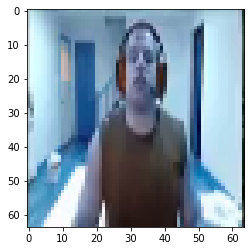

In [5]:
t1 = [data["data"][20000, :, :, :], data["data"][20001, :, :, :], data["data"][20002, :, :, :], data["data"][20003, :, :, :], data["data"][20004, :, :, :]]

plt.imshow(t1[0], interpolation='nearest')
plt.show()

In [2]:
print(data["valence_labels"][20000, :],data["valence_labels"][20001, :], data["valence_labels"][20002, :], data["valence_labels"][20003, :], data["valence_labels"][20004, :])

[1. 0. 0.] [1. 0. 0.] [1. 0. 0.] [1. 0. 0.] [1. 0. 0.]


As we can see the pixels have been normalized already in the preprocessing. 
In the following plots, one video is shown with its first frame and its last frame. Not a lot of difference is seen. This means data augmentation would be crucial to make the model learn better, faster and in a more robust way.

Text(0.5, 0.98, 'Sample Streamer Face Data')

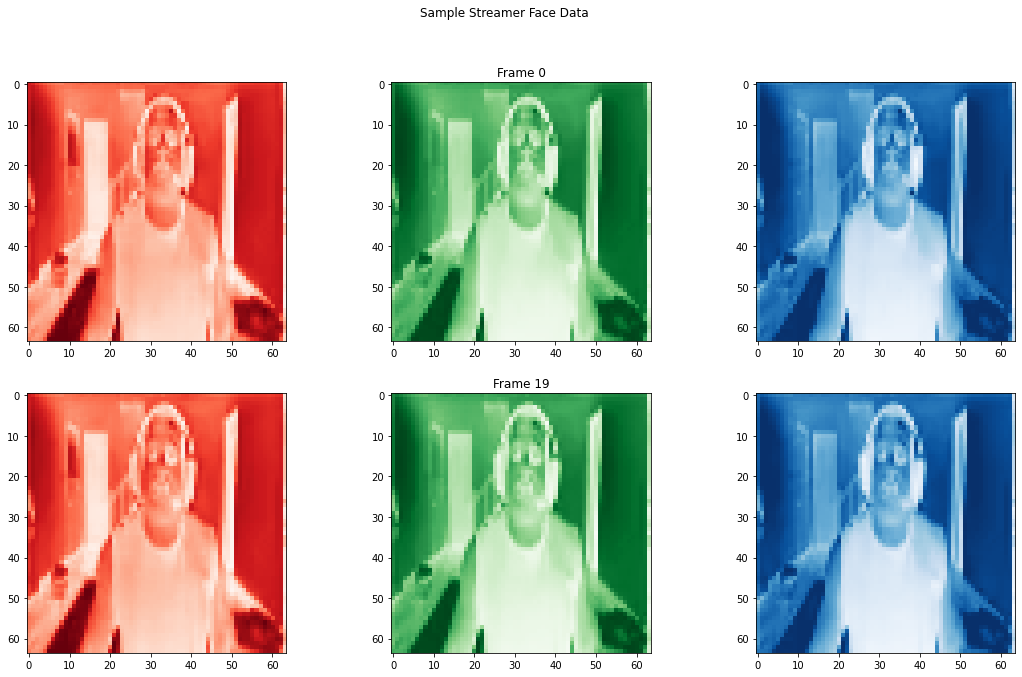

In [6]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)
axs[0, 1].set_title('Frame 0')
axs[0, 0].imshow(t1[0][:,:,0], cmap="Reds")
axs[0, 1].imshow(t1[0][:,:,1], cmap="Greens")
axs[0, 2].imshow(t1[0][:,:,2], cmap="Blues")
axs[1, 1].set_title('Frame 19')
axs[1, 0].imshow(t1[4][:,:,0], cmap="Reds")
axs[1, 1].imshow(t1[4][:,:,1], cmap="Greens")
axs[1, 2].imshow(t1[4][:,:,2], cmap="Blues")
fig.suptitle('Sample Streamer Face Data')

(20, 128, 128, 3)


Text(0.5, 0.98, 'Sample Game Interface Data')

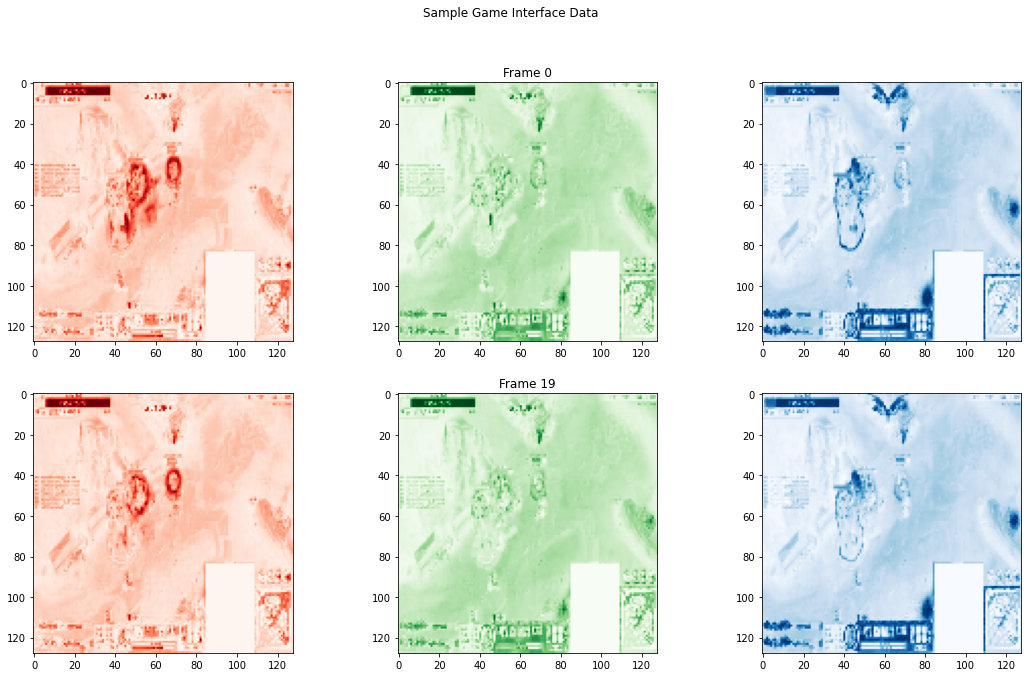

In [7]:
import os

#load sample game data from processing folder
game_data = np.empty(())
game_data = np.load("processed/94_01_01.mp4/game.npy")
    
print(game_data.shape)

fig, axs = plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)
axs[0, 0].imshow(game_data[0, :, :, 0], cmap="Reds")
axs[0, 1].set_title('Frame 0')
axs[0, 1].imshow(game_data[0, :, :, 1], cmap="Greens")
axs[0, 2].imshow(game_data[0, :, :, 2], cmap="Blues")
axs[1, 0].imshow(game_data[19, :, :, 0], cmap="Reds")
axs[1, 1].set_title('Frame 19')
axs[1, 1].imshow(game_data[19, :, :, 1], cmap="Greens")
axs[1, 2].imshow(game_data[19, :, :, 2], cmap="Blues")
fig.suptitle("Sample Game Interface Data")

### Labels

In the following three plots the amount of occurrence per label has been plotted. There are multiple types of labels as described in the research paper:

Valence:<br />
*Negative Valence*:  Negative feeling e.g sadness.<br />
*Neutral Valence*: A lack of discernible valence.<br />
*Positive Valence* Positive feeling e.g. happiness.<br />

Arousal:<br />
*Neutral Arousal*: A lack of discernible arousal.<br />
*Positive Arousal*: Strong emotional response e.g. anger or
excitement.

Game State:<br />
*In Lane*: Farming ‘creeps’ (game controlled enemies) in a lane. Often the default action.<br />
*Shopping*: Spending gold earned in-game on items.<br />
*Returning to Lane*: Walking back to lane after re-spawning, shopping or returning to base for health.<br />
*Roaming*: Roaming the ‘jungle’ area, the space between lanes.<br />
*Fighting*: Engaging in player vs player combat.<br />
*Pushing*: Pushing into and attacking the enemy base.<br />
*Defending*: Defending their own base.<br />
*Dead*: Killed and is awaiting re-spawn.<br />
*Miscellaneous*: Something not covered above.<br />

#### Train Data Label Distributions

Index(['Unnamed: 0', 'Unnamed: 0.1', 'File', 'V_Neg', 'V_Neut', 'V_Pos',
       'A_Neut', 'A_Pos', 'Laning', 'Shopping', 'Returning', 'Roaming',
       'Fighting', 'Pushing', 'Defending', 'Dead', 'Misc'],
      dtype='object')


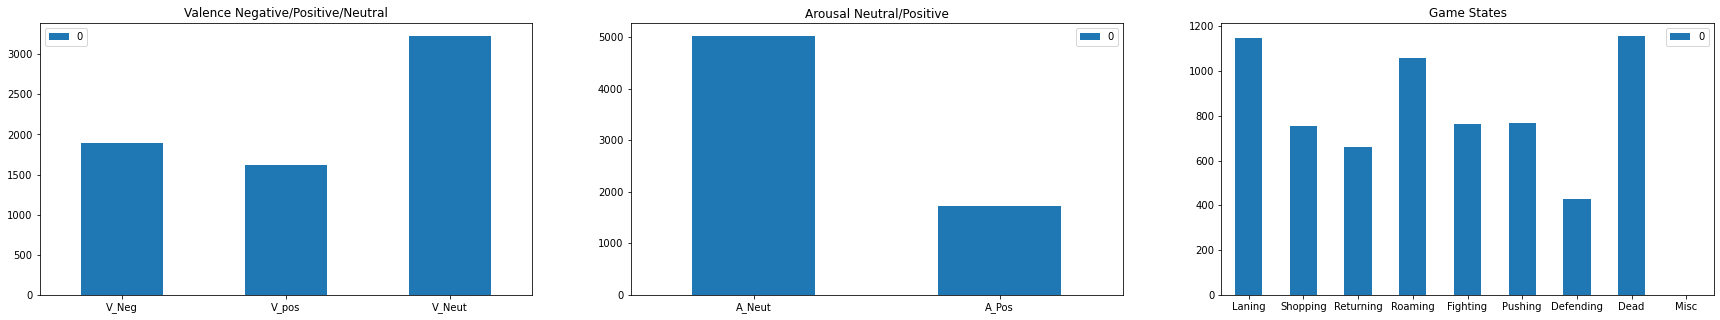

In [43]:
df_labels_train = pd.read_csv("train_clean.csv")
print(df_labels_train.columns)

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(30, 5)

pd.DataFrame([df_labels_train[df_labels_train["V_Neg"] == 1]["V_Neg"].count(),
              df_labels_train[df_labels_train["V_Pos"] == 1]["V_Pos"].count(), 
              df_labels_train[df_labels_train["V_Neut"] == 1]["V_Neut"].count()], 
             ["V_Neg", "V_pos", "V_Neut"]).plot(ax=axs[0], kind='bar', title="Valence Negative/Positive/Neutral", rot=0)
    
pd.DataFrame([df_labels_train[df_labels_train["A_Neut"] == 1]["A_Neut"].count(), 
              df_labels_train[df_labels_train["A_Pos"] == 1]["A_Pos"].count()], 
             ["A_Neut", "A_Pos"]).plot(ax=axs[1], kind='bar', title="Arousal Neutral/Positive", rot=0)


pd.DataFrame([df_labels_train[df_labels_train["Laning"] == 1]["Laning"].count(), 
              df_labels_train[df_labels_train["Shopping"] == 1]["Shopping"].count(), 
              df_labels_train[df_labels_train["Returning"] == 1]["Returning"].count(), 
              df_labels_train[df_labels_train["Roaming"] == 1]["Roaming"].count(), 
              df_labels_train[df_labels_train["Fighting"] == 1]["Fighting"].count(), 
              df_labels_train[df_labels_train["Pushing"] == 1]["Pushing"].count(), 
              df_labels_train[df_labels_train["Defending"] == 1]["Defending"].count(), 
              df_labels_train[df_labels_train["Dead"] == 1]["Dead"].count(), 
              df_labels_train[df_labels_train["Misc"] == 1]["Misc"].count()], 
             ['Laning', 'Shopping', 'Returning', 'Roaming', 'Fighting', 'Pushing', 'Defending', 'Dead', 'Misc']).plot(ax=axs[2], kind='bar', title="Game States", rot=0)

plt.show()

##Doesnt matchup with amount of data?

### Test Data Valence Labels Distribution

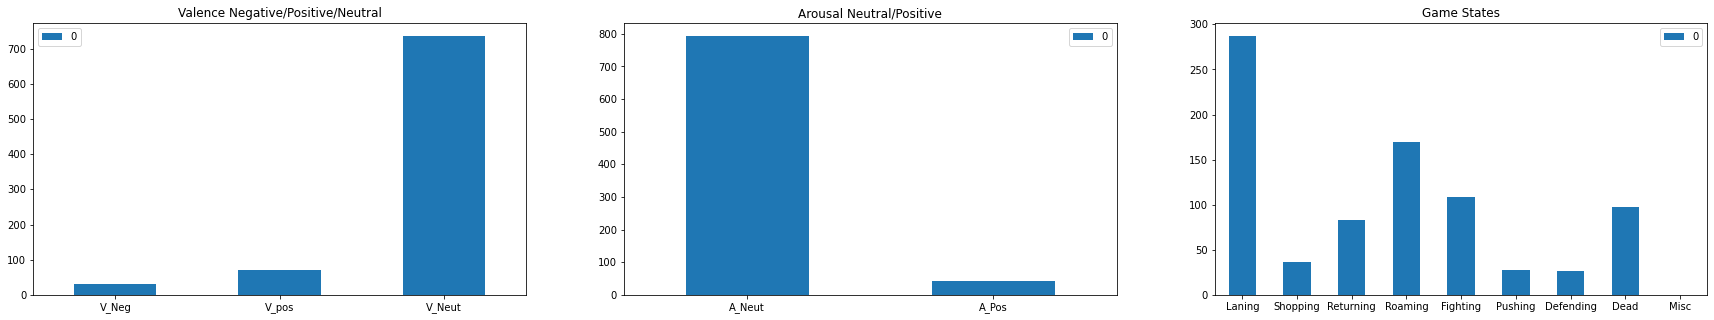

In [44]:
df_labels_test = pd.read_csv("test_clean.csv")

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(30, 5)

pd.DataFrame([df_labels_test[df_labels_test["V_Neg"] == 1]["V_Neg"].count(),
              df_labels_test[df_labels_test["V_Pos"] == 1]["V_Pos"].count(), 
              df_labels_test[df_labels_test["V_Neut"] == 1]["V_Neut"].count()], 
             ["V_Neg", "V_pos", "V_Neut"]).plot(ax=axs[0], kind='bar', title="Valence Negative/Positive/Neutral", rot=0)
    
pd.DataFrame([df_labels_test[df_labels_test["A_Neut"] == 1]["A_Neut"].count(), 
              df_labels_test[df_labels_test["A_Pos"] == 1]["A_Pos"].count()], 
             ["A_Neut", "A_Pos"]).plot(ax=axs[1], kind='bar', title="Arousal Neutral/Positive", rot=0)


pd.DataFrame([df_labels_test[df_labels_test["Laning"] == 1]["Laning"].count(), 
              df_labels_test[df_labels_test["Shopping"] == 1]["Shopping"].count(), 
              df_labels_test[df_labels_test["Returning"] == 1]["Returning"].count(), 
              df_labels_test[df_labels_test["Roaming"] == 1]["Roaming"].count(), 
              df_labels_test[df_labels_test["Fighting"] == 1]["Fighting"].count(), 
              df_labels_test[df_labels_test["Pushing"] == 1]["Pushing"].count(), 
              df_labels_test[df_labels_test["Defending"] == 1]["Defending"].count(), 
              df_labels_test[df_labels_test["Dead"] == 1]["Dead"].count(), 
              df_labels_test[df_labels_test["Misc"] == 1]["Misc"].count()], 
             ['Laning', 'Shopping', 'Returning', 'Roaming', 'Fighting', 'Pushing', 'Defending', 'Dead', 'Misc']).plot(ax=axs[2], kind='bar', title="Game States", rot=0)

plt.show()

As we can see, the labels for the test are not very evenly distributed. Since those labels are per video, the amount of pictures we have is actually 20x the amount of labels.

In the following plot, I plotted the average of the first 1000 different face cams.

Number of images:  1000.0


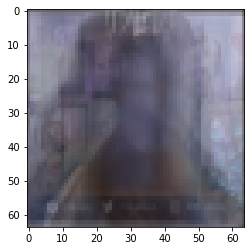

In [14]:
pictures = data["data"][0:5000:5, :, :, :].sum(axis=0)
N = 5000/5

plt.imshow(pictures/N, interpolation='nearest')
print("Number of images: ", N)

The following plot shows the average game interface. The Screen flashes grey when the player dies, so this will probably be the easiest label to predict and in the research paper it was, in fact, the label which showed the highest accuracy.

At the bottom right there is a mini-map of the game. When the two teams are fighting against each other, more characters should show up on the mini-map closely together. When farming for gold, healing up or buying items, the characters on the mini-map are usually not close together. Therefore information from the mini-map is a big indicator for most labels. Furthermore, when fighting, players use abilities to fight opponents which go on "cooldown" (they can't use strong abilities twice in a row). This is also shown to the player on the interface. 

When dead or healing up, most players tend to hit "tab" on their keyboard which results in a new interface popping up which shows additional information about all the players in the game. Similarly, a player needs to browse through a "shop"-interface to buy items. Those are also key visual indicators.

Number of images:  1000.0


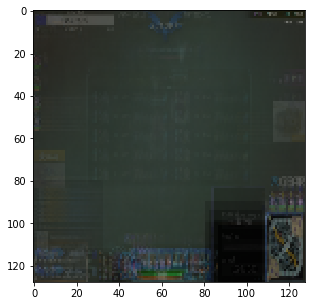

In [45]:
data_game = np.load("data_game.npz")
pictures = data_game["data"][0:5000:5, :, :, :].sum(axis=0)
N = 5000/5

plt.imshow(pictures/N, interpolation='nearest')
print("Number of images: ", N)